In [2]:
from google.colab import files


uploaded = files.upload()

Saving 66.xlsx to 66.xlsx


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

In [6]:
df.head()


,Age,Gender,specify,Occupation,Monthly income,City of residence,specify.1,"Do you use online platforms to purchase groceries, medicines, or other daily essentials? (Blinkit, Zepto, Instamart, Bigbasket, Dunzo daily, Flipkart minutes etc)",How often do you make purchases online?,What types of products do you typically order online? (Select all that apply),...,"8: I will not pay more than a reasonable fee for UAV delivery, even if it is faster.",8: The cost of UAV delivery will be less important to me if the service offers clear and measurable benefits.,9: I enjoy experimenting with cutting-edge technologies like UAV delivery for their potential to transform logistics and redefine convenience.,9: I am motivated to try UAV delivery because it offers a forward-thinking solution with advanced automation and efficiency.,9: I believe UAV delivery is innovative because it uses advanced technology to address environmental challenges.,9: Using UAV delivery gives me a sense of being innovative and staying modern.,10: I intend to use UAV delivery for my purchases in the future.,10: I plan to try UAV delivery services as soon as they become available.,"10: If UAV delivery services are reliable and fully available, I predict I will use them regularly and frequently.","10: I will rely on UAV delivery in situations requiring contactless solutions, such as emergencies or pandemics."
0,25 to 34,Female,NaN,Student,10000-30000,Kolkata,NaN,Yes,A few times a week,Groceries; Electronics; Clothing,...,5- Strongly Agree,3- Neutral,4- Agree,3- Neutral,3- Neutral,4- Agree,4- Agree,4- Agree,4- Agree,5- Strongly Agree
1,18 to 24,Female,NaN,Student,10000-30000,Kolkata,NaN,Yes,A few times a week,Groceries; Electronics; Clothing; Medicines,...,4- Agree,3- Neutral,4- Agree,4- Agree,4- Agree,4- Agree,4- Agree,4- Agree,4- Agree,4- Agree
2,18 to 24,Male,NaN,Student,10000-30000,Other (please specify),Kharagpur,Yes,A few times a month,Groceries,...,5- Strongly Agree,5- Strongly Agree,5- Strongly Agree,5- Strongly Agree,5- Strongly Agree,5- Strongly Agree,5- Strongly Agree,3- Neutral,3- Neutral,3- Neutral
3,25 to 34,Male,NaN,Student,10000-30000,Other (please specify),akbarpur ambedkar nagar u.p.,Yes,A few times a week,Groceries; Electronics; Clothing; Medicines,...,3- Neutral,4- Agree,4- Agree,5- Strongly Agree,4- Agree,5- Strongly Agree,4- Agree,3- Neutral,3- Neutral,4- Agree
4,25 to 34,Male,NaN,Private,10000-30000,Other (please specify),Kannur,Yes,A few times a month,Groceries; Electronics; Clothing,...,5- Strongly Agree,4- Agree,4- Agree,4- Agree,3- Neutral,4- Agree,4- Agree,3- Neutral,4- Agree,5- Strongly Agree


In [7]:
def analyze_outliers(df):
    numerical_cols = df.select_dtypes(include=['number']).columns

    if numerical_cols.empty:
        print("No numerical columns found for analysis.")
        return

    quantiles_95 = df[numerical_cols].quantile(0.95)
    outliers = df[numerical_cols] > quantiles_95
    outliers_count = outliers.sum()

    print("Outlier Counts:")
    print(outliers_count.to_frame(name="Outlier Count"))

    print("Generating Box Plots for Numerical Columns...")
    for col in numerical_cols:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

In [16]:
likert_columns = [col for col in df.columns if any(col.startswith(f"{i}:") for i in range(1, 11))]

df_likert = df[likert_columns]

likert_map = {
    "1- Strongly Disagree": 1,
    "2- Disagree": 2,
    "3- Neutral": 3,
    "4- Agree": 4,
    "5- Strongly Agree": 5
}

def convert_likert_to_num(item):
    """Converts a string like '4-Agree' to integer 4, using a lookup dict or parsing."""
    if isinstance(item, str):
        for key, value in likert_map.items():
            if item.startswith(key.split('-')[0]):
                return value

        try:
            return int(item.split('-')[0].strip())
        except ValueError:
            return None
    return None


df_likert_numeric = df_likert.applymap(convert_likert_to_num)

# import ace_tools as tools
# tools.display_dataframe_to_user(name="Likert Scale Data", dataframe=df_likert)
# tools.display_dataframe_to_user(name="Numeric Likert Scale Data", dataframe=df_likert_numeric)


<ipython-input-16-d447c6297678>:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_likert_numeric = df_likert.applymap(convert_likert_to_num)


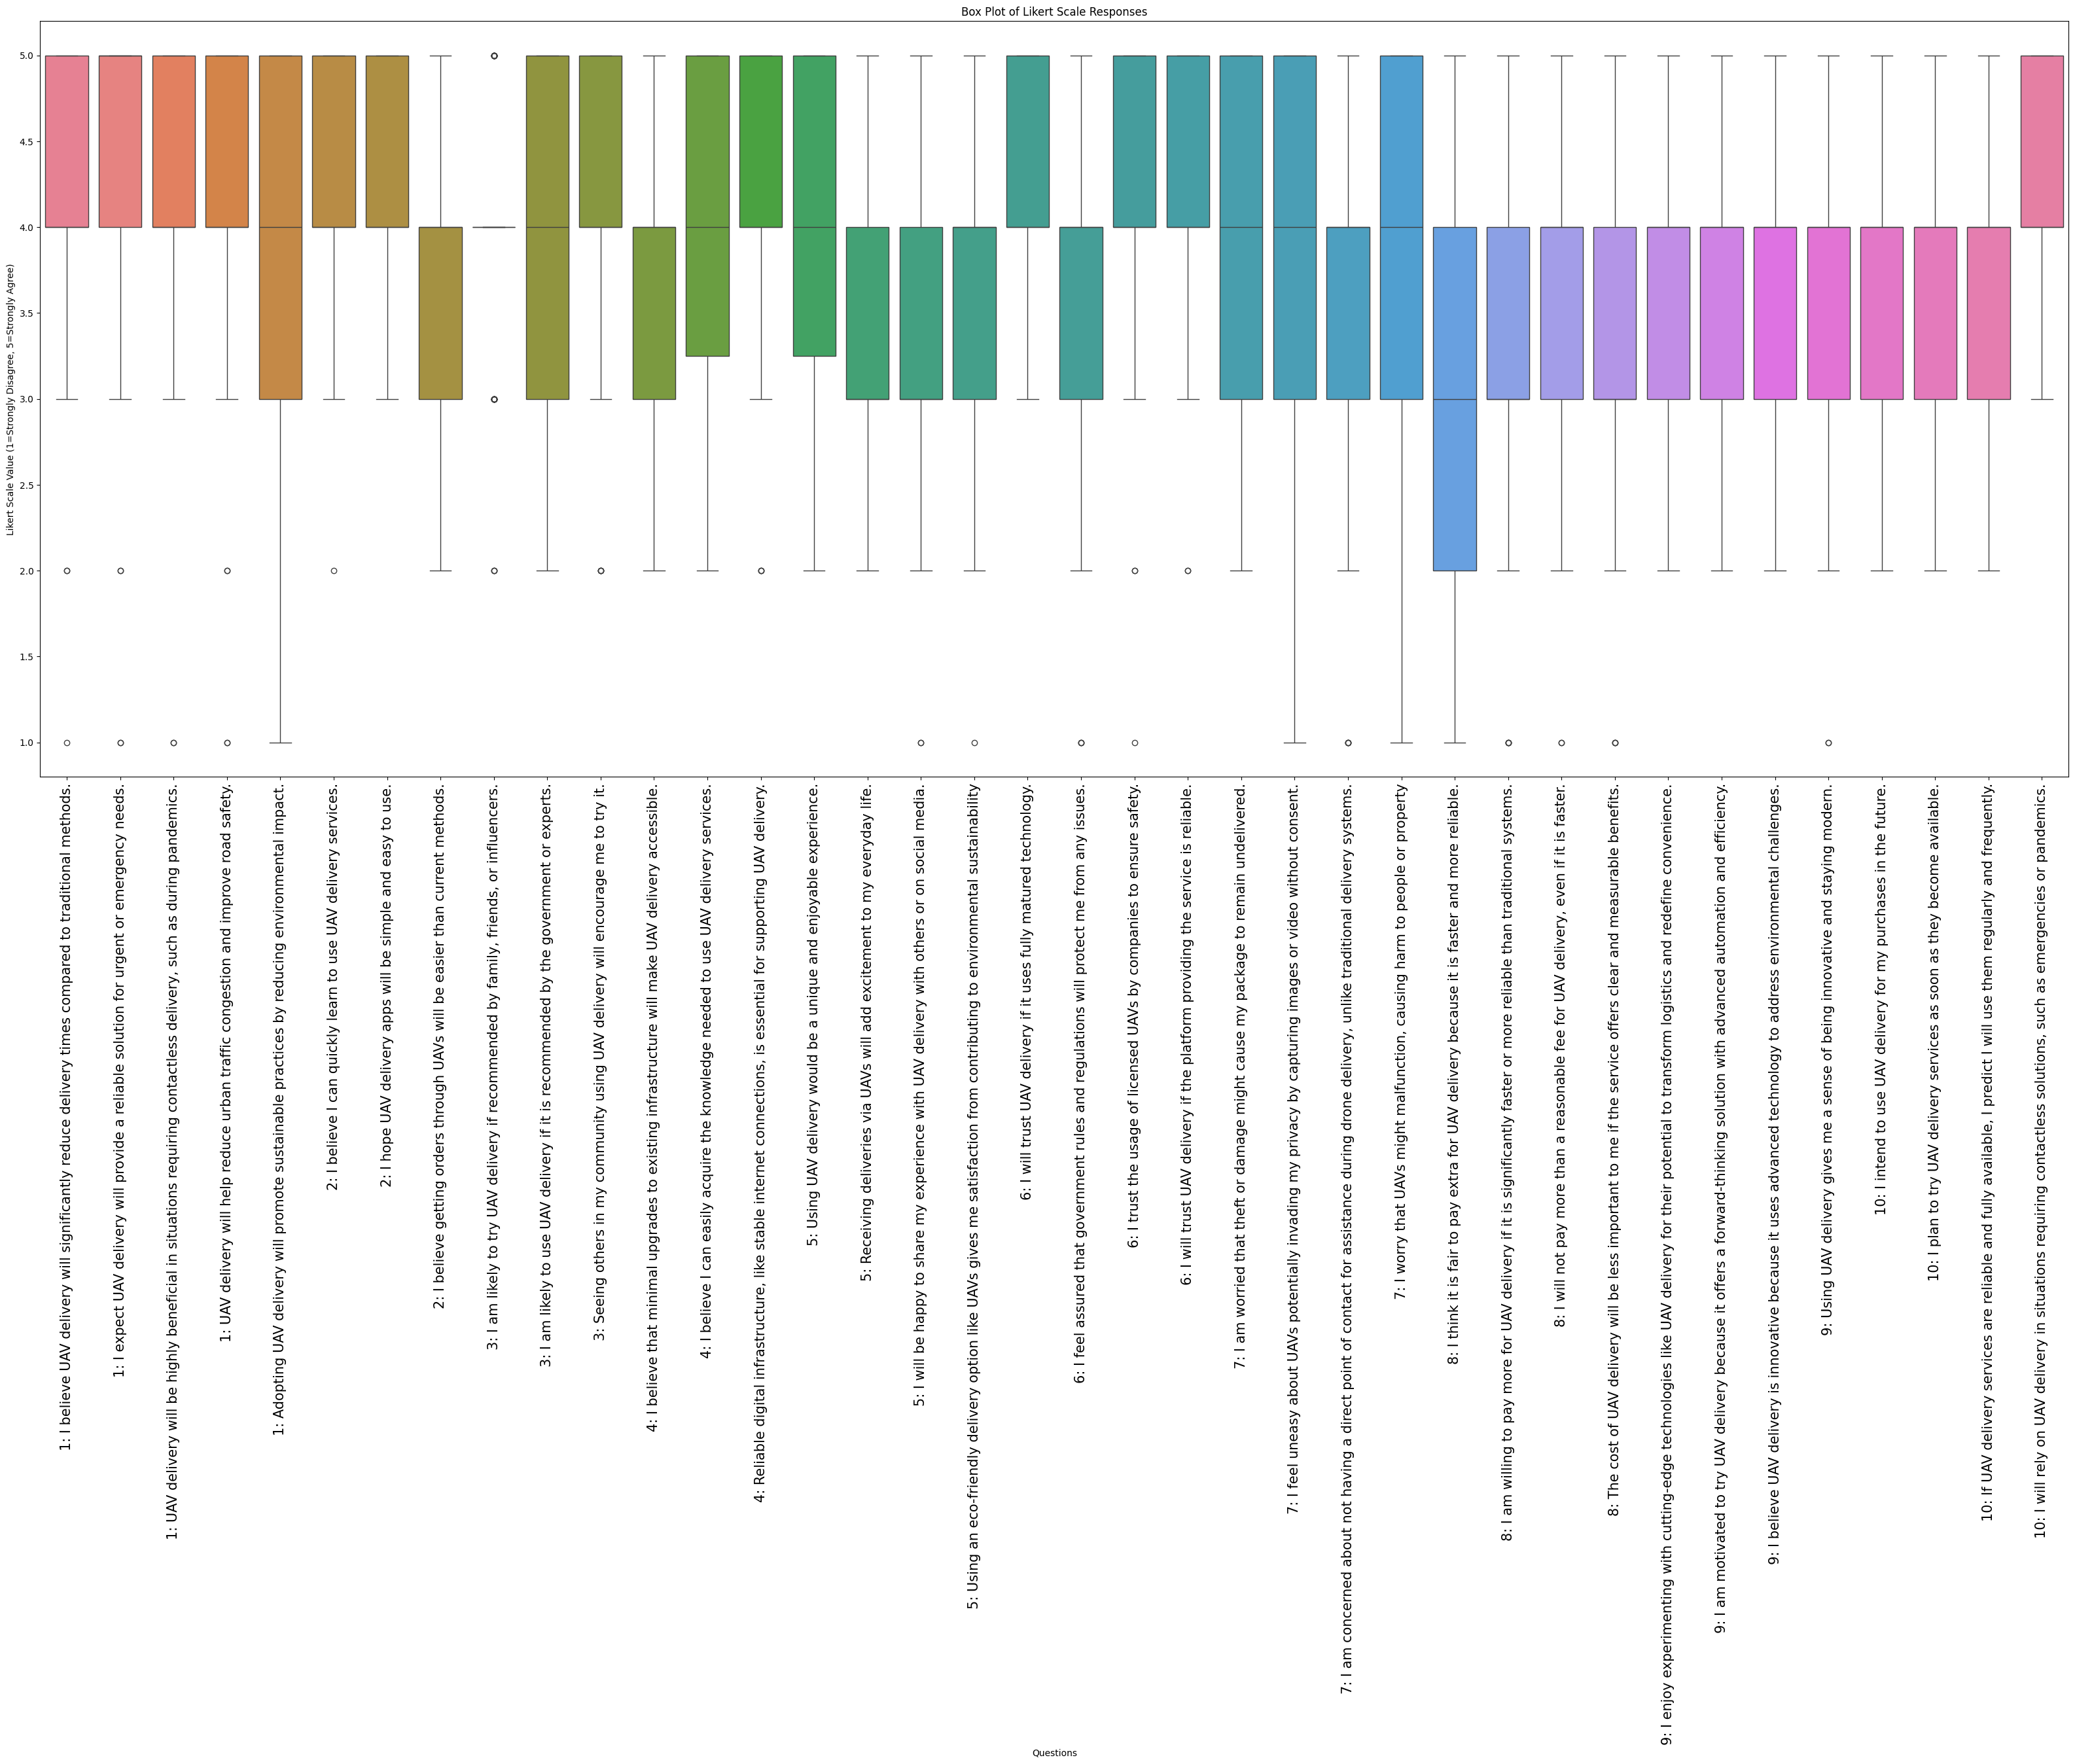

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a box plot of the numeric Likert scale data
plt.figure(figsize=(40, 15))
sns.boxplot(data=df_likert_numeric)
plt.xticks(rotation=90, fontsize= 15)
plt.title("Box Plot of Likert Scale Responses")
plt.xlabel("Questions")
plt.ylabel("Likert Scale Value (1=Strongly Disagree, 5=Strongly Agree)")
plt.show()